In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



In [2]:
df=pd.read_csv("house_price.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df=df.drop("Id",1)

In [5]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
df_copy=df.copy()

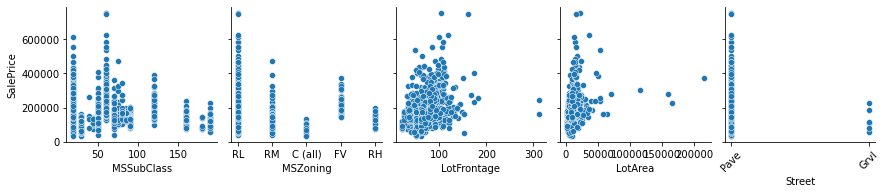

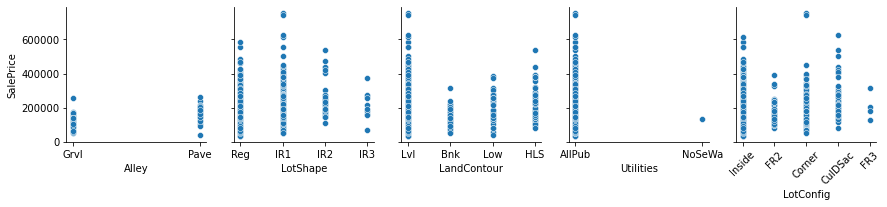

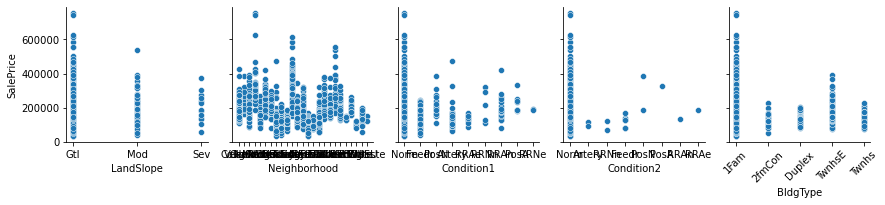

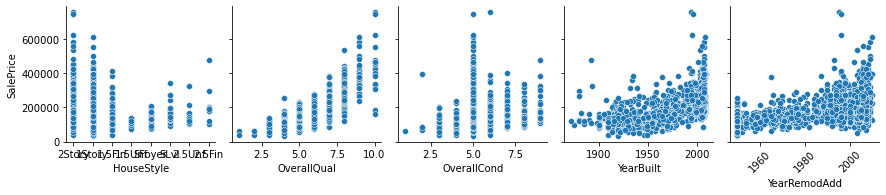

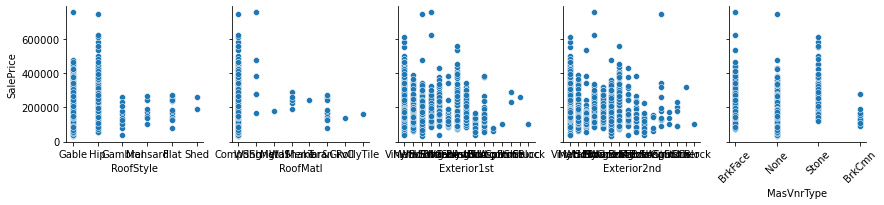

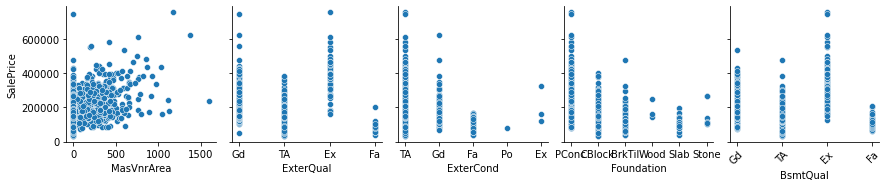

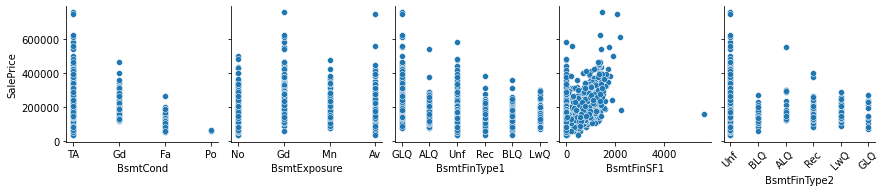

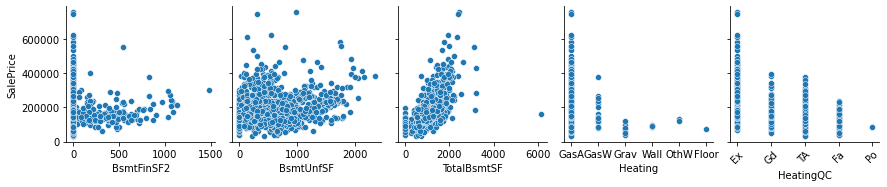

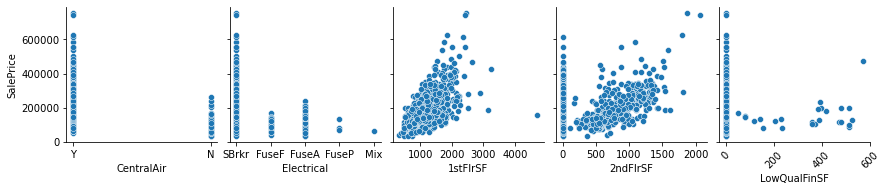

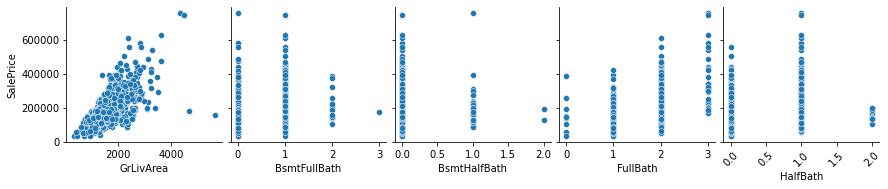

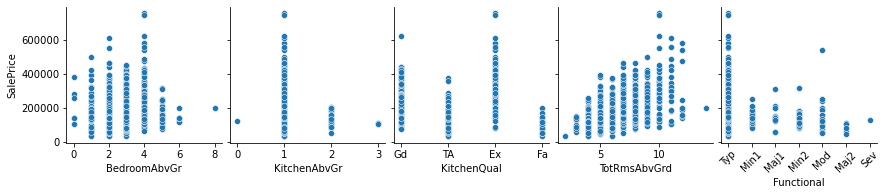

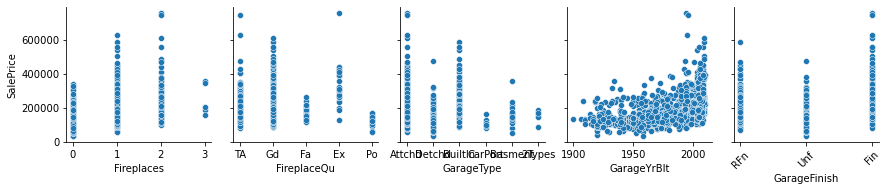

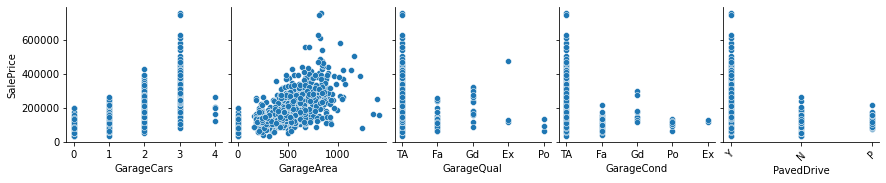

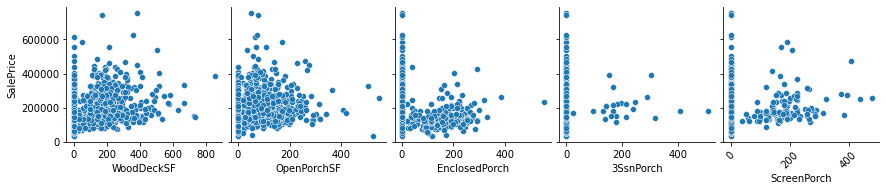

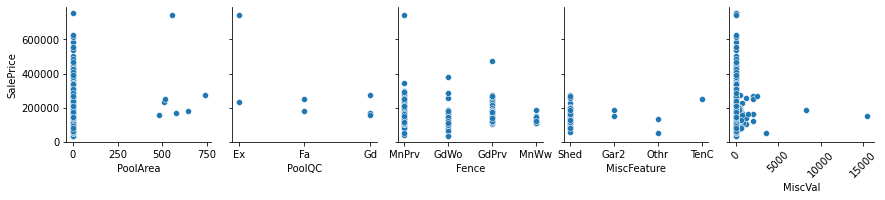

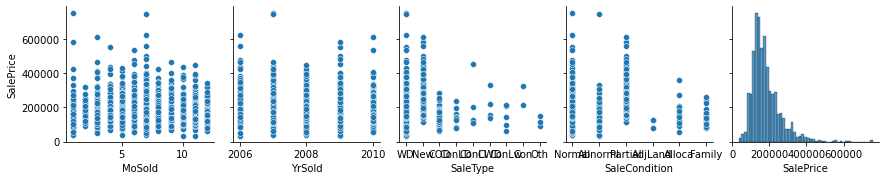

In [9]:
for i in range(0, len(df_copy.columns), 5):
    sns.pairplot(df, x_vars=df_copy.columns[i:i+5], y_vars=["SalePrice"])
    plt.xticks(rotation=45);

In [10]:
obj=[]
for i in df_copy.columns:
    if df[i].dtype=="O":
        obj.append(i)

df_obj=df_copy.reindex(columns=obj)

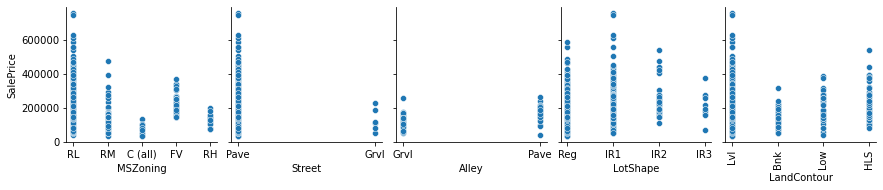

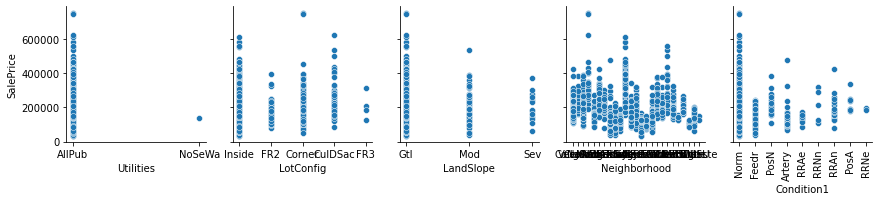

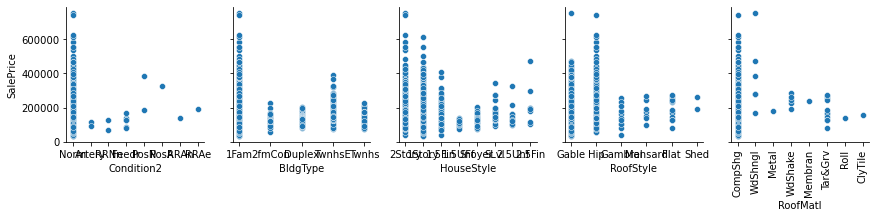

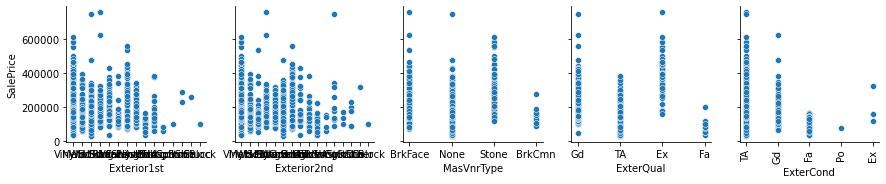

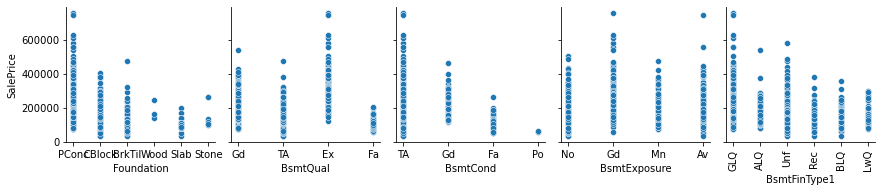

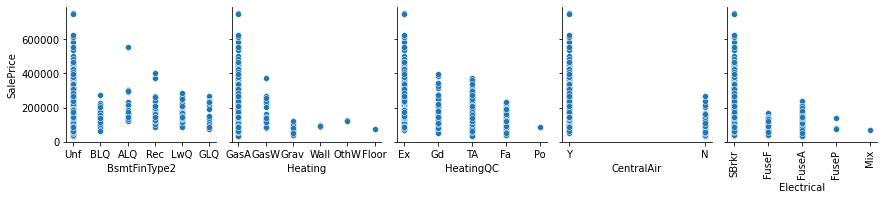

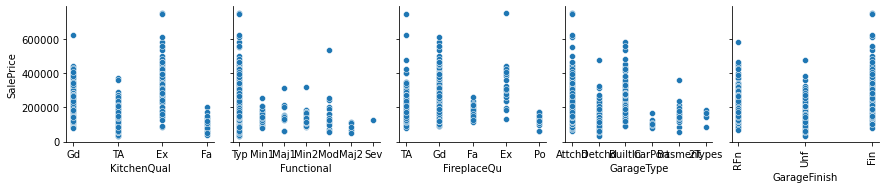

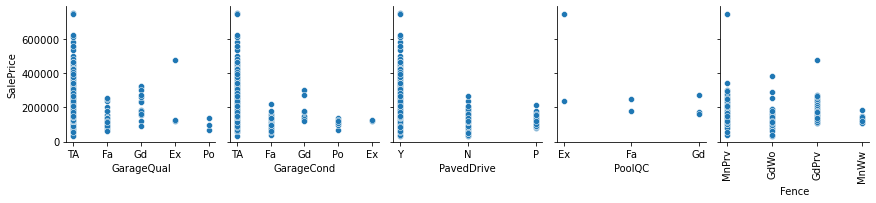

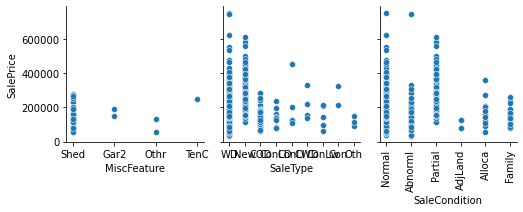

In [11]:
for i in range(0, len(df_obj.columns), 5):
    sns.pairplot(df, x_vars=df_obj.columns[i:i+5], y_vars=["SalePrice"])
    plt.xticks(rotation=90);

In [12]:
yeni=[]
for i in df.columns:
    for j in df[i].value_counts(normalize=True):
        if j>0.90:
            yeni.append(i)

In [13]:
(df.isna().sum().sort_values(ascending=False)/len(df)*100)[:10]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [14]:
kolonlar=[i for i in df.columns if i not in yeni]

In [15]:
df2=df.reindex(columns=yeni)
df=df.reindex(columns=kolonlar)

In [16]:
df.drop(["PoolQC","Alley"],1, inplace=True)

In [17]:
((df==0).sum().sort_values(ascending=False)/len(df)*100)[:10]

BsmtFinSF2       88.561644
EnclosedPorch    85.753425
HalfBath         62.534247
MasVnrArea       58.972603
BsmtFullBath     58.630137
2ndFlrSF         56.780822
WoodDeckSF       52.123288
Fireplaces       47.260274
OpenPorchSF      44.931507
BsmtFinSF1       31.986301
dtype: float64

In [18]:
df.drop(["BsmtFinSF2","EnclosedPorch"],1, inplace=True)

In [19]:
df_copy=df.copy()

In [20]:
df_copy["LotFrontage"].fillna(df_copy["LotFrontage"].mean, inplace=True)

In [21]:
y=df_copy["SalePrice"]
X=df_copy.drop("SalePrice",1)

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.3)

In [23]:
from category_encoders import TargetEncoder

In [24]:
target_encoder=TargetEncoder()
X_train=target_encoder.fit_transform(X_train,y_train)
X_test=target_encoder.transform(X_test)

In [25]:
xgb=XGBRegressor(n_estimators=2500, max_depth=5, learning_rate=0.01, colsample_bytree= 0.2)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print(f"train score: {xgb.score(X_train, y_train)}")
print(f"test score: {xgb.score(X_test, y_test)}")  
print("___________________________________________")
print(f"mae: {mean_absolute_error(y_test, y_pred)}") 
print(f"cross_mae: {-1*(cross_val_score(xgb, X_train, y_train, cv=3, scoring='neg_mean_absolute_error').mean())}")
print("___________________________________________")
print(f"mse: {mean_squared_error(y_test, y_pred)}")
print(f"cross_mse: {-1*(cross_val_score(xgb, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean())}")
print("___________________________________________")
print(f"rmse: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"cross_rmse: {-1*(cross_val_score(xgb, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean())}")
print("___________________________________________")
print(f"r2 score: {r2_score(y_test, y_pred)}")

train score: 0.9982410863403782
test score: 0.9138844828425241
___________________________________________
mae: 14378.802056578197
cross_mae: 15582.039636544227
___________________________________________
mse: 546850598.136633
cross_mse: 901060371.8481464
___________________________________________
rmse: 23384.836927732318
cross_rmse: 29424.86487209227
___________________________________________
r2 score: 0.9138844828425241


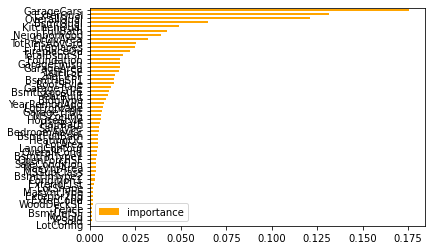

In [26]:
im=pd.DataFrame({"importance": xgb.feature_importances_}, index=X_train.columns)
im.sort_values(by="importance", ascending=True).plot(kind="barh", color="orange");

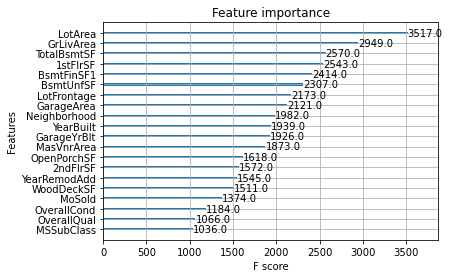

In [27]:
from xgboost import plot_importance
plot_importance(xgb,max_num_features=20);

#take first 10 features


In [28]:
tablo=pd.DataFrame({"y":y_test, "y_hat":y_pred})

In [29]:
tablo=tablo.reset_index().drop("index",1)
tablo

,y,y_hat
0,107900,109604.046875
1,135000,138654.515625
2,156000,148552.187500
3,139000,128766.257812
4,126000,117872.343750
...,...,...
433,290000,306256.218750
434,147000,153313.281250
435,260000,233958.796875
436,35311,71622.968750


In [30]:
px.line(tablo, x=tablo.index, y=["y","y_hat"])

In [31]:
tablo2=tablo.sort_values(by="y").reset_index().drop("index",1)

In [32]:
tablo2["diff"]=abs(tablo2["y"]-tablo2["y_hat"])

In [33]:
tablo2["rate"]=(round(abs(tablo2["y"]-tablo2["y_hat"]))*100)/tablo2["y"]

In [34]:
tablo2.sort_values(by="diff", ascending=False)

,y,y_hat,diff,rate
437,755000,587176.125000,167823.875000,22.228344
184,147000,297666.406250,150666.406250,102.493878
436,582933,458422.750000,124510.250000,21.359230
226,160000,278997.656250,118997.656250,74.373750
428,392500,287122.125000,105377.875000,26.847898
...,...,...,...,...
127,132500,132267.984375,232.015625,0.175094
142,137000,137192.921875,192.921875,0.140876
94,125000,125174.289062,174.289062,0.139200
389,271900,272074.093750,174.093750,0.063994


In [35]:
px.line(tablo2, x=tablo2.index, y=["y","y_hat"])

## coding things for streamlit

In [36]:
import pickle as pkl

pkl.dump(xgb, open("model.pkl", "wb"))

pkl.dump(target_encoder, open("target_encoder.pkl", "wb"))

pkl.dump(df, open("df.pkl", "wb"))

In [37]:

import pickle
import pandas as pd
import numpy as np
import streamlit as st

model=pickle.load(open("model.pkl", "rb"))
target_encoder=pickle.load(open("target_encoder.pkl", "rb"))

def predict(model, input_df):
    input_df_encoded=target_encoder.transform(input_df)
    prediction=model.predict(input_df_encoded)
    return prediction

In [38]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [39]:
dfz = pickle.load(open("df.pkl", "rb"))

In [40]:
dfz["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [41]:
list = ["LotArea", "GrLivArea","BsmtUnfSF","TotalBsmtSF", "GarageArea", "1stFlrSF", "LotFrontage","YearBuilt", "MasVnrArea","GarageYrBlt","Neighborhood","2ndFlrSF","YearRemodAdd","OpenPorchSF","MoSold","OverallQual"]

In [42]:
# lotarea = st.number_input("Lütfen LotArea değerini giriniz: ")
# grlivarea = st.number_input("Lütfen GrLivArea değerini giriniz: ")
# bsmtunfsf = st.number_input("Lütfen BsmtUnfSF değerini giriniz: ")
# totalbsmtsf = st.number_input("Lütfen TotalBsmtSF değerini giriniz: ")
# garagearea = st.number_input("Lütfen GarageArea değerini giriniz: ")
# firstflrsf = st.number_input("Lütfen 1stFlrSF değerini giriniz: ")
# lotfrontage = st.number_input("Lütfen LotFrontage değerini giriniz: ")
# yearbuilt = st.number_input("Lütfen YearBuilt değerini giriniz: ")
# masvnrarea = st.number_input("Lütfen MasVnrArea değerini giriniz: ")
# garageyrblt = st.number_input("Lütfen GarageYrBlt değerini giriniz: ")
# neighborhood = st.selectbox("Lütfen Neighborhood değerini giriniz: ", df["Neighborhood"].unique())
# secondndflrsf = st.number_input("Lütfen 2ndFlrSF değerini giriniz: ")
# yearremodadd = st.number_input("Lütfen YearRemodAdd değerini giriniz: ")
# openporchsf = st.number_input("Lütfen OpenPorchSF değerini giriniz: ")
# mosold = st.number_input("Lütfen MoSold değerini giriniz: ")
# overallqual = st.number_input("Lütfen OverallQual değerini giriniz: ")


In [57]:
# X dataframe'i içinde dolaş eğer kolon list'de yoksa,adını sonra obje ise mode, float ise median gösterern döngü yaz
for i in X.columns:
    if i not in list:
        if X[i].dtypes == "object":
            print(i," == ", X[i].mode()[0])
            print("________________________")
        else:
            print(i," == ", X[i].median())
            print("________________________")

MSSubClass  ==  50.0
________________________
MSZoning  ==  RL
________________________
LotShape  ==  Reg
________________________
LandContour  ==  Lvl
________________________
LotConfig  ==  Inside
________________________
Condition1  ==  Norm
________________________
BldgType  ==  1Fam
________________________
HouseStyle  ==  1Story
________________________
OverallCond  ==  5.0
________________________
RoofStyle  ==  Gable
________________________
Exterior1st  ==  VinylSd
________________________
Exterior2nd  ==  VinylSd
________________________
MasVnrType  ==  None
________________________
ExterQual  ==  TA
________________________
ExterCond  ==  TA
________________________
Foundation  ==  PConc
________________________
BsmtQual  ==  TA
________________________
BsmtExposure  ==  No
________________________
BsmtFinType1  ==  Unf
________________________
BsmtFinSF1  ==  383.5
________________________
BsmtFinType2  ==  Unf
________________________
HeatingQC  ==  Ex
____________________

In [47]:
X["Neighborhood"].dtypes

dtype('O')

In [58]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,RFn,2,548,0,61,NaN,2,2008,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,RFn,2,460,298,0,NaN,5,2007,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,RFn,2,608,0,42,NaN,9,2008,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,Unf,3,642,0,35,NaN,2,2006,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,RFn,3,836,192,84,NaN,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,1Fam,...,RFn,2,460,0,40,NaN,8,2007,WD,Normal
1456,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,1Fam,...,Unf,2,500,349,0,MnPrv,2,2010,WD,Normal
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,1Fam,...,RFn,1,252,0,60,GdPrv,5,2010,WD,Normal
1458,20,RL,68.0,9717,Reg,Lvl,Inside,NAmes,Norm,1Fam,...,Unf,1,240,366,0,NaN,4,2010,WD,Normal


In [59]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [62]:
len(X.columns)

54